In [24]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
#匯入程式庫

In [25]:
all_df = pd.read_excel("C:/Users/3c/Desktop/test123.xlsx")#資料集
#all_df = pd.read_excel("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")#資料集

In [26]:
all_df.shape  #行與列 第一行貌似不計算?

(588, 134)

In [27]:
all_df.head()  #顯示前5筆

,Name,Hive,situation,0,5,10,16,21,26,32,...,651,656,662,667,672,678,683,689,694,699
0,CF003-Active-Day-(214)__segment0,CF003,Active,0.002646,0.002907,0.004406,0.006780,0.009356,0.022236,0.040542,...,0.009609,0.010124,0.011213,0.011446,0.013078,0.015698,0.015959,0.016050,0.016606,0.017191
1,CF003-Active-Day-(214)__segment1,CF003,Active,0.001472,0.001662,0.002896,0.004911,0.009555,0.016962,0.027468,...,0.013305,0.015009,0.015548,0.015138,0.016861,0.018307,0.020014,0.019813,0.022878,0.023671
2,CF003-Active-Day-(214)__segment2,CF003,Active,0.004596,0.005824,0.009474,0.017472,0.036140,0.056778,0.086479,...,0.058500,0.065658,0.065303,0.077764,0.073391,0.087552,0.082318,0.099304,0.105709,0.104895
3,CF003-Active-Day-(214)__segment3,CF003,Active,0.007089,0.008062,0.013179,0.019902,0.042330,0.065887,0.115904,...,0.093800,0.096851,0.104217,0.131570,0.139930,0.152351,0.145682,0.151212,0.168438,0.172146
4,CF003-Active-Day-(214)__segment4,CF003,Active,0.007473,0.009021,0.016146,0.028829,0.055193,0.091079,0.115295,...,0.105640,0.110819,0.120574,0.134106,0.137403,0.160447,0.162396,0.188583,0.208554,0.208032


In [30]:
def PreprocessData(raw_df):                 #預處理函數程式設計
    DataTable=raw_df                        #預留資料表
    df=raw_df.drop(['Name','Hive'], axis=1) #移除不使用的列
    df['situation']= df['situation'].map({'Active':0, 'MissingQueen': 1}).astype(int) #Label 文字轉數字
    #df=raw_df.drop(['sample_name'], axis=1)
    #df['label']= df['label'].map({'active':0, 'missing queen': 1}).astype(int)
    #X = df.iloc[:,1:].values                #取得 所有行；第1列至20行(共20筆) 的資料
    X = df.iloc[:,1:].values                #取得 所有行；第1列至20行(共20筆) 的資料
    y = df.iloc[:,0].values                 #取得 所有行；第0列(共1筆) 的資料
    return X,y,DataTable

In [31]:
X,y,DataTable=PreprocessData(all_df) #預處理資料

In [32]:
"""
#顏色預覽
cm = plt.cm.get_cmap('Accent')  
xy = range(6)  
z = xy  
sc = plt.scatter(xy, xy, c=z, vmin=0, s=35, cmap=cm)  
plt.colorbar(sc)  
plt.show()
"""

"\n#顏色預覽\ncm = plt.cm.get_cmap('Accent')  \nxy = range(6)  \nz = xy  \nsc = plt.scatter(xy, xy, c=z, vmin=0, s=35, cmap=cm)  \nplt.colorbar(sc)  \nplt.show()\n"

In [33]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#↑ 要留下的維度條件 int:要取得的維度數量；float:取得0-100% 影響比例；None為全部讀取
X_train = pca.fit_transform(X)
#↑ pca 特徵向量運算
explained_variance = pca.explained_variance_ratio_
#↑ 計算特徵向量的影響百分比


In [34]:

# 顯示降維的方差百分比，取小數前3位
print(len(X_train),len(y))
np.around(explained_variance, decimals=3)


588 588


array([0.233, 0.177])

In [35]:

# 顯示運算後的維度數量
len(explained_variance)


2

In [36]:
#explained_variance

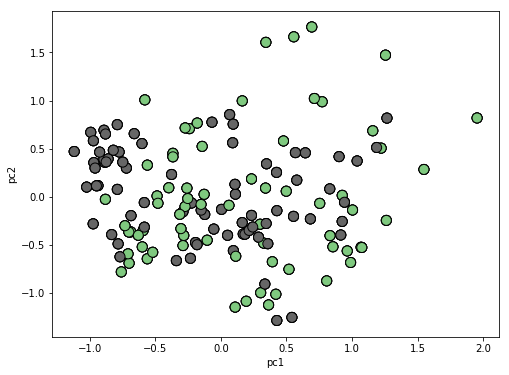

In [37]:

# 2D Plot
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y,
           cmap=plt.cm.Accent, edgecolor='k', s=100)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()


In [38]:
"""
# 3D Plot
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y,
           cmap=plt.cm.Accent, edgecolor='k', s=100)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()
"""

'\n# 3D Plot\nfig = plt.figure(1, figsize=(8, 6))\nax = Axes3D(fig, elev=-150, azim=110)\nax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y,\n           cmap=plt.cm.Accent, edgecolor=\'k\', s=100)\nax.set_title("First three PCA directions")\nax.set_xlabel("1st eigenvector")\nax.set_ylabel("2nd eigenvector")\nax.set_zlabel("3rd eigenvector")\nplt.show()\n'

In [39]:
"""
import csv
with open('test'+'.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    a = np.array(cols) #自訂標籤
    b = np.hstack((DataTable,X_train)) #左右合併
    c = np.vstack((a,b)) #上下合併
    for i in range(c.shape[0]):
        Dhat = c[i]
        writer.writerow(Dhat)
"""

"\nimport csv\nwith open('test'+'.csv', 'w', newline='') as csvfile:\n    writer = csv.writer(csvfile)\n    a = np.array(cols) #自訂標籤\n    b = np.hstack((DataTable,X_train)) #左右合併\n    c = np.vstack((a,b)) #上下合併\n    for i in range(c.shape[0]):\n        Dhat = c[i]\n        writer.writerow(Dhat)\n"

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, trainDf, testDF = train_test_split(X,y,DataTable, test_size = 0.2)
#資料集切割 分成 隨機切割成 訓練與測試資料(比例 80：20 )

In [41]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear',probability = True)  
svclassifier.fit(X_train, y_train)  
#SVM 模型訓練 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred = svclassifier.predict(X_test)  # SVM預測
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0])

In [43]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import learning_curve

In [44]:
from sklearn.metrics import classification_report, confusion_matrix   #顯示結果與混淆矩陣
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  



[[54  5]
 [ 6 53]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        59
           1       0.91      0.90      0.91        59

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



Text(0.5, 0, 'false_positive_rate')

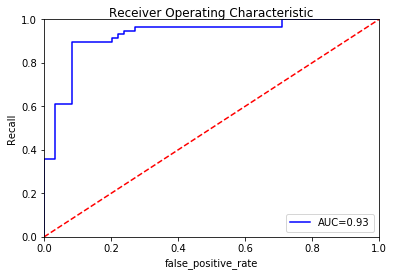

In [45]:
#ROC曲線跟AUC

#AUC即是ROC曲線下半部的面積，AUC主要用於衡量二分類問題中機器學習演算法效能或者泛化能力。

# y_pro:第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。
y_pro=svclassifier.predict_proba(X_test)

false_positive_rate,recall,thresholds=roc_curve(y_test,y_pro[:,1])

roc_auc=auc(false_positive_rate,recall)

ax3 = plt.subplot()

ax3.set_title("Receiver Operating Characteristic",verticalalignment='center')

plt.plot(false_positive_rate,recall,'b',label='AUC=%0.2f'%roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.0])

plt.ylabel('Recall')

plt.xlabel('false_positive_rate')


Text(0.5, 0, 'Recall')

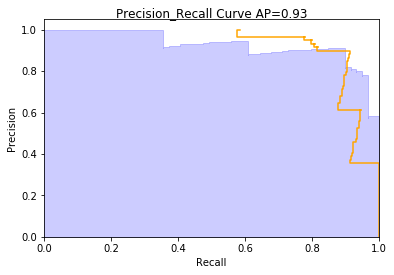

In [46]:
#PR曲線，由精確率和召回率的點連成的線，橫軸為Recall ,縱軸為Precision，在PR曲線中越右上凸越好，PR想要Precision 和Recall同時高

average_precision = average_precision_score(y_test, y_pro[:, 1])

precision,recall,thresholds=precision_recall_curve(y_test,y_pro[:,1])

ax2 = plt.subplot()

ax2.set_title("Precision_Recall Curve AP=%0.2f"%average_precision,verticalalignment='center')

plt.step(precision, recall,where='post',alpha=1,color='orange')

plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.ylabel('Precision')

plt.xlabel('Recall')


In [47]:
y_pred #預測結果

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0])

In [48]:
y_test #原本結果

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
#dfLP = pd.DataFrame({'label':y_test, 'predict':y_pred})

In [ ]:
#dfLP[(dfLP.label!=dfLP.predict)]

In [ ]:
#DataTable[6:7]

In [ ]:
#繪圖

def plot_point(X_train,y_train,Support_vector_index,W,b):
    for i in range(np.shape(X_train)[0]):
        if y_train[i] == 1:
            plt.scatter(X_train[i][0],X_train[i][1],c='b',s=20)
        else:
            plt.scatter(X_train[i][0],X_train[i][1],c='y',s=20)
    
    for j in Support_vector_index:
        plt.scatter(X_train[j][0],X_train[j][1], s=100, c = '', alpha=0.5, linewidth=1.5, edgecolor='red')
 
    x = np.arange(0,10,0.01)
    y = (W[0][0]*x+b)/(-1*W[0][1])
    plt.scatter(x,y,s=5,marker = 'h')
    plt.show()

def plot_svc_decision_function(svclassifier, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)  
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svclassifier.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(svclassifier.support_vectors_[:, 0],
                   svclassifier.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svclassifier)
"""

In [ ]:
"""
n_Support_vector = svclassifier.n_support_#支持向量个数
Support_vector_index = svclassifier.support_#支持向量索引
W = svclassifier.coef_#方向向量W
b =  svclassifier.intercept_#截距项b
 
    #绘制分类超平面
plot_point(X_train,y_train,Support_vector_index,W,b)
"""





